<a href="https://colab.research.google.com/github/dushanranasinghe/Google-Colab/blob/main/prediction_with_json_obj.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
!pip install prophet

     |████████████████████████████████| 65 kB 4.8 MB/s 
     |████████████████████████████████| 49 kB 7.4 MB/s 
     |████████████████████████████████| 214 kB 54.5 MB/s 
  Created wheel for prophet: filename=prophet-1.0.1-py3-none-any.whl size=6640761 sha256=0f2656fa89de20c45826684945bb82ba19a49d8bb7be95aff913b08b3ced17b7
  Stored in directory: /root/.cache/pip/wheels/4e/a0/1a/02c9ec9e3e9de6bdbb3d769d11992a6926889d71567d6b9b67
Successfully built prophet
  Attempting uninstall: cmdstanpy
    Found existing installation: cmdstanpy 0.9.5
    Uninstalling cmdstanpy-0.9.5:
      Successfully uninstalled cmdstanpy-0.9.5
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
fbprophet 0.7.1 requires cmdstanpy==0.9.5, but you have cmdstanpy 0.9.68 which is incompatible.


In [29]:
import pandas as pd
import json
import requests
from prophet import Prophet

DIGITAL_CURRENCY = "DIGITAL_CURRENCY_DAILY"
SYMBOL = "BTC"
MARKET = "CNY"
API_KEY = "demo"

json_get = requests.get('https://www.alphavantage.co/query?function='+DIGITAL_CURRENCY+'&symbol='+SYMBOL+'&market='+MARKET+'&apikey='+API_KEY+'')

data_arr = json_get.json()["Time Series (Digital Currency Daily)"]

new_data_arr = []

DAY_HIGH = '2a. high ('+MARKET+')'
DAY_LOW = '3a. low ('+MARKET+')'

for obj in data_arr:
    json_obj = {}
    json_obj["ds"] = obj
    json_obj["y"] = (float(data_arr[obj][DAY_HIGH]) + float(data_arr[obj][DAY_LOW])) / 2
    new_data_arr.append(json_obj)

strigify_arr = json.dumps(new_data_arr)
    
df = pd.read_json(strigify_arr)
df.head()


,ds,y
0,2021-10-16,395665.26404
1,2021-10-15,385461.69400
2,2021-10-14,371198.19862
3,2021-10-13,360236.40342
4,2021-10-12,358996.86200


In [33]:
m = Prophet()
m.fit(df)
future = m.make_future_dataframe(periods=365)
future.tail()

INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


,ds
1360,2022-10-12
1361,2022-10-13
1362,2022-10-14
1363,2022-10-15
1364,2022-10-16


In [34]:
forecast = m.predict(future)
forecast[['ds', 'yhat', 'yhat_lower', 'yhat_upper']].tail()


,ds,yhat,yhat_lower,yhat_upper
1360,2022-10-12,300516.061960,119883.790408,499051.119138
1361,2022-10-13,301100.455272,121551.056417,499799.121640
1362,2022-10-14,301279.610606,120691.156516,493899.258313
1363,2022-10-15,302201.664345,130207.240121,501372.449454
1364,2022-10-16,300710.515521,118347.740643,496592.361458


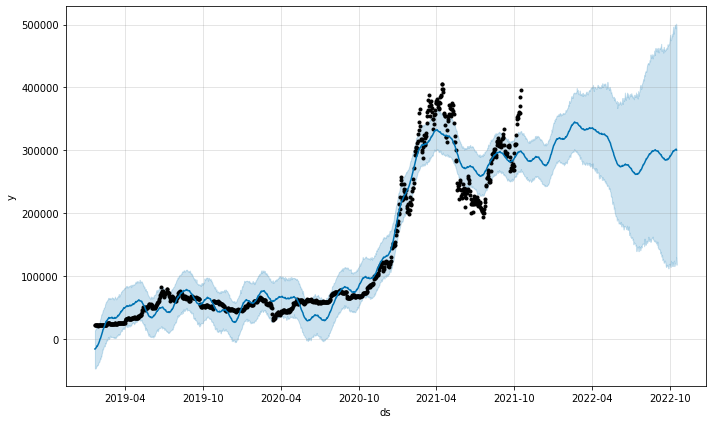

In [35]:
fig1 = m.plot(forecast)
